## DifferentialEquations.jl で Mackey-Glass equationを解く


### Makey-Glass equation

Blood productionのモデル。非線形のtime-delay differential equation。Time-delay $x(t-\tau)$のfeedbackがある分、見かけよりも自由度が大きい(厳密には無限自由度)。

\begin{equation}
\frac{d x(t)}{d t}=\frac{a x(t-\tau)}{1+x^{b}(t-\tau)}-c x(t)
\end{equation}

ここではKanno&Uchida PRE 2014にしたがって、$a=2$,、$b=10$、$c=1$、$\tau=5$とする。


In [105]:
# 問題の定義
using DifferentialEquations

# DifferentialEquations.jlでは、過去の履歴を指定するために、history function h(p, t)を使う。pはパラメータで、tは時間。
# これを指定すると、過去のsolutionを使ってtにおけるsolutionを内挿してくれる。
# 問題を定義するには、f(du, u, p, t)を拡張して、f(du, u, h, p, t)を使う。

function mackey_glass(du, u, h, p, t)
 du[1] = 2.0*h(p, t-5)[1]/(1.0 + h(p, t-5)[1]^10) - 1.0*u[1]
end



mackey_glass (generic function with 1 method)

In [106]:
lags = [5]

u0 = [0.5]
h(p, t) = ones(1)
tspan = (0.0, 100.0)
#prob = ODEProblem(makey_glass, u0, tspan)
prob = DDEProblem(mackey_glass, u0, h, tspan; constant_lags=lags)


DDEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: [0.5]

In [108]:
# 問題を解く

#alg = MethodOfSteps(Tsit5())
sol = solve(prob,Tsit5())
#sol = solve(prob, saveat=0.1) #0.1毎に解を保存する
#sol = solve(prob,save_everystep=false) #毎ステップ、解を保存する
#sol = solve(prob,alg_hints=[:stiff]) #問題がStiffであることを伝えて、ソルバーを選択してもらう
#sol = solve(prob,Tsit5()) #直接ソルバーを指定する Tsitouras 5/4 Runge-Kutta method

retcode: Success
Interpolation: Automatic order switching interpolation
t: 151-element Array{Float64,1}:
   0.0                
   0.10003996803834632
   0.3452480702014222 
   0.6758286116796435 
   1.089665062846694  
   1.6031246633795115 
   2.221359161173539  
   2.9609844562010235 
   3.838311055317857  
   4.881990223755428  
   5.0                
   5.109512359178997  
   5.505823498619218  
   ⋮                  
  91.37642622678662   
  92.05913902118355   
  92.94214547682031   
  93.68330125893998   
  94.75434183558724   
  95.46330258069172   
  96.10389030936194   
  96.77056157345439   
  97.54393059968648   
  98.35663071625147   
  99.25328485462758   
 100.0                
u: 151-element Array{Array{Float64,1},1}:
 [0.5]     
 [0.547599]
 [0.645978]
 [0.745633]
 [0.831835]
 [0.899366]
 [0.945768]
 [0.974114]
 [0.989232]
 [0.996205]
 [0.99636] 
 [1.00213] 
 [1.08428] 
 ⋮         
 [0.959751]
 [1.06217] 
 [1.23219] 
 [1.12217] 
 [1.10192] 
 [1.20236] 
 [1.01689] 
 [1

In [109]:
# 結果の取得

# 結果(sol)はsolutionオブジェクトという独自オブジェクトとして出力されるが、配列・構造体のように扱うことができる。

sol[5]

sol.t[5]

#結果を配列にまとめる
#[t+u for (u,t) in tuples(sol)]

#t=0.45での解をinterpolateする
sol(0.45)


1-element Array{Float64,1}:
 0.6811862334250551

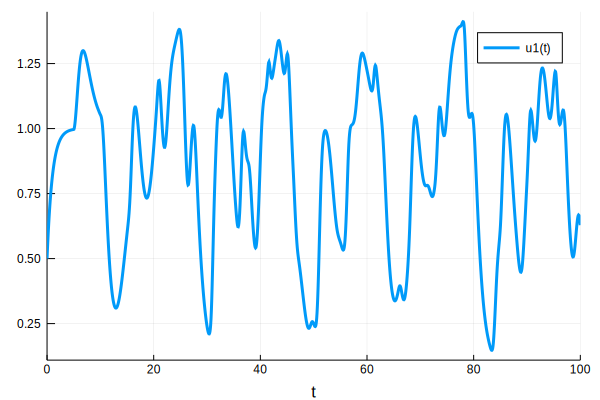

In [110]:
# 結果のプロット

using Plots
plot(sol)

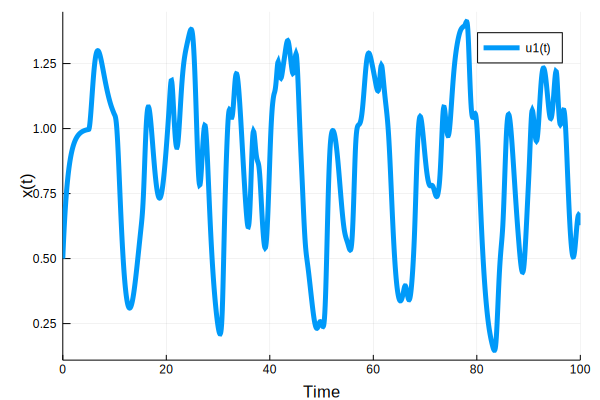

In [111]:
plot(sol,linewidth=5,
     xaxis="Time",
     yaxis="x(t)")

In [112]:
t1 = 5:0.1:100
t2 = t1 .- 5.0

0.0:0.1:95.0

In [113]:
u1 = vcat(sol(t1).u...)
u2 = vcat(sol(t2).u...)

951-element Array{Float64,1}:
 0.5               
 0.5475812909504788
 0.5906347073348184
 0.6295908881073669
 0.6648401284676667
 0.6967349812666928
 0.7255942108629778
 0.7517073624105377
 0.7753362220775544
 0.7967158191699857
 0.8160603205114058
 0.8335642876867918
 0.8494038938549824
 ⋮                 
 1.0779117999396495
 1.0611660492956096
 1.0484957474614385
 1.040799020219428 
 1.0386930010228805
 1.0425138309961037
 1.0523166589344115
 1.0678756413041268
 1.0886839422425834
 1.1138831723068028
 1.1414982308077584
 1.1689681136329675

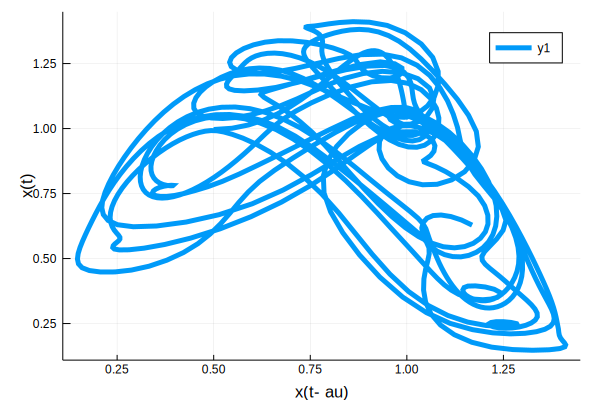

In [114]:
plot(u2, u1, linewidth=5,
     xaxis="x(t-\tau)",
     yaxis="x(t)")

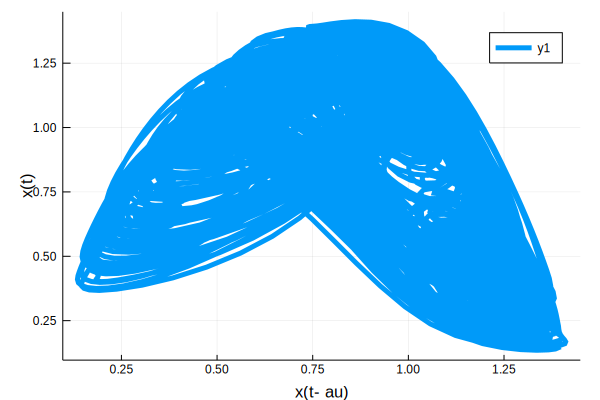

In [104]:
tspan = (0.0, 1000.0)
prob = DDEProblem(mackey_glass, u0, h, tspan; constant_lags=lags)
sol2 = solve(prob, Tsit5())
t1 = 5:0.1:1000
t2 = t1 .- 5.0
u1 = vcat(sol2(t1).u...)
u2 = vcat(sol2(t2).u...)

plot(u2, u1, linewidth=5,
     xaxis="x(t-\tau)",
     yaxis="x(t)")